# What is Ensemble learning?

__In the world of Statistics and Machine Learning, Ensemble learning techniques attempt to make the performance of the predictive models better by improving their accuracy. Ensemble Learning is a process using which multiple machine learning models (such as classifiers) are strategically constructed to solve a particular problem.__

![](https://miro.medium.com/max/1838/1*AU_Yuk-8ihw768gwv7hVCw.png)

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib.style as stl
import seaborn as sns
%matplotlib inline
import random
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")


In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.shape

(1599, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
data["quality"].unique()

array([5, 6, 7, 4, 8, 3])

In [8]:
data.shape

(1599, 12)

In [9]:
for i in range (1599):
    if (data.loc[i,"quality"]< 6 ) :
        data.loc[i,"quality"]=0
    else :
        data.loc[i,"quality"]=1
        

In [10]:
data["quality"].unique()

array([0, 1])

In [11]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [12]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [13]:
def outlier_viz(col):
    color = random.choice(['r', 'g', 'b'])
    fig, ax = plt.subplots(1,2,figsize=(18,5))
    sns.distplot(col, ax=ax[0], color=color)
    sns.boxplot(col, ax=ax[1], color=color)
    plt.suptitle('Distribution & Boxplot for Outlier Detection')
    fig.show()
    return None

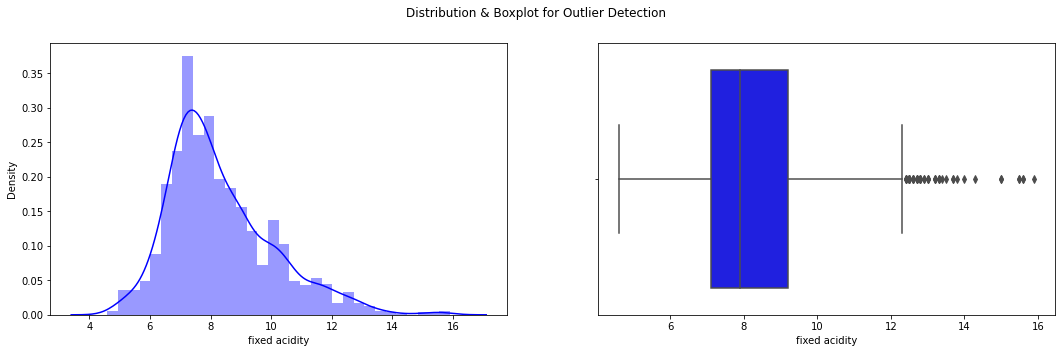

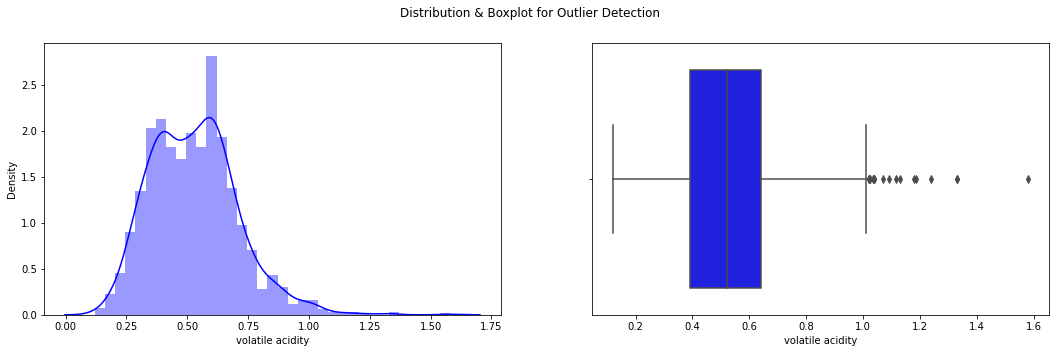

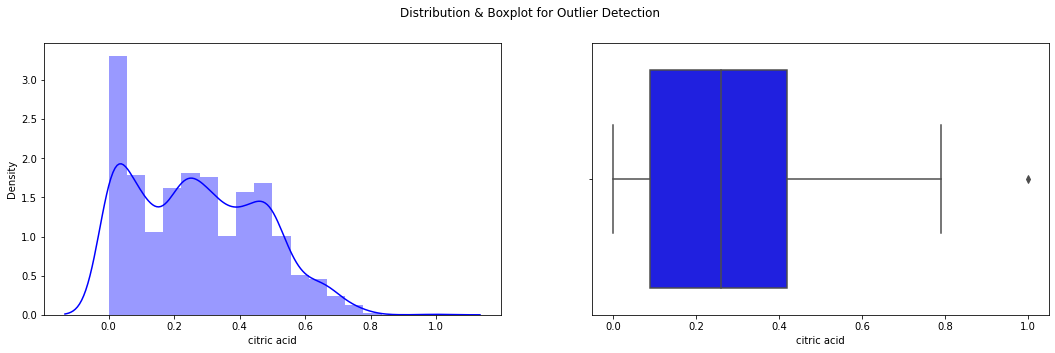

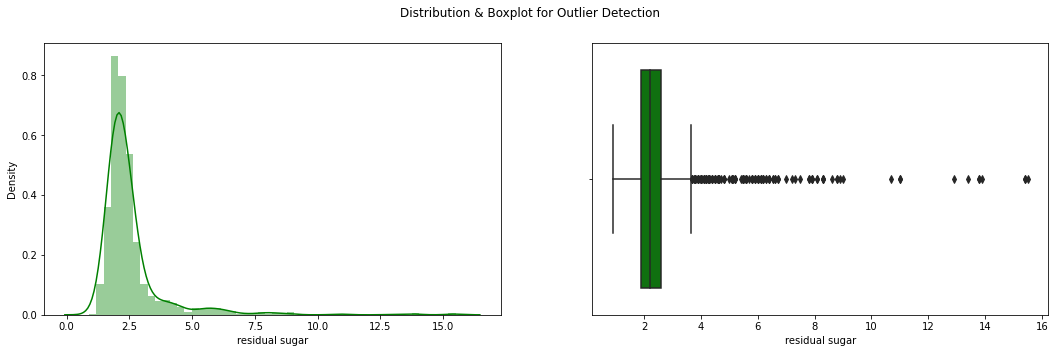

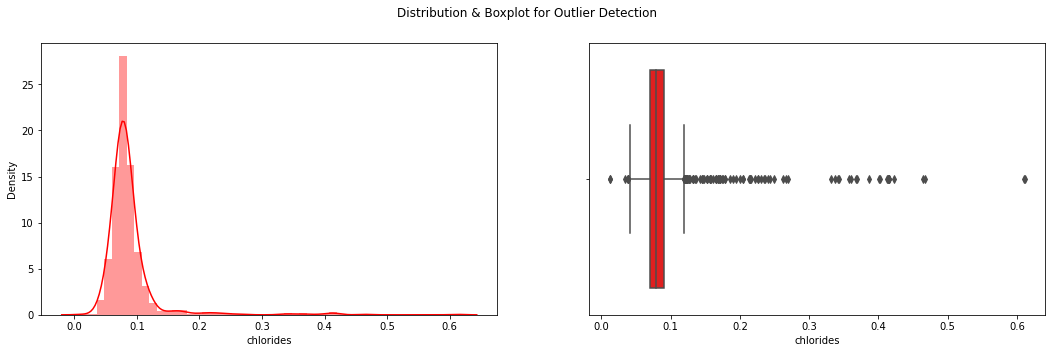

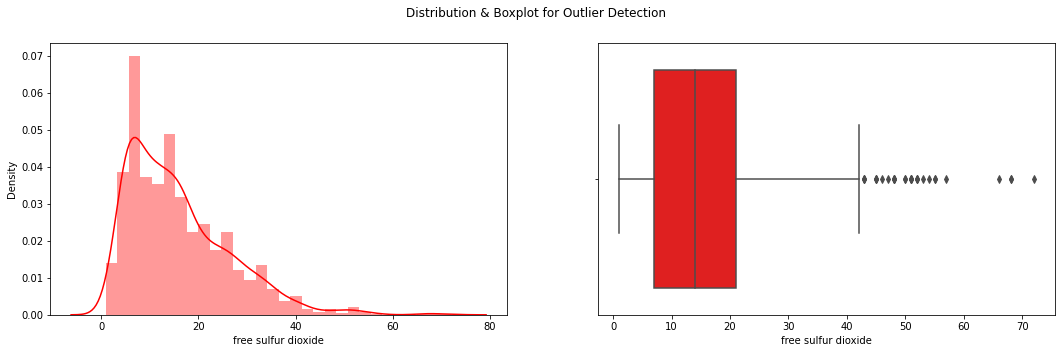

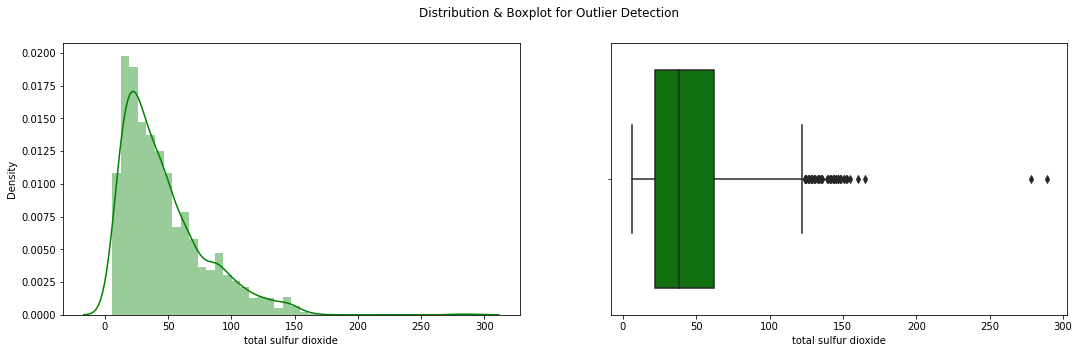

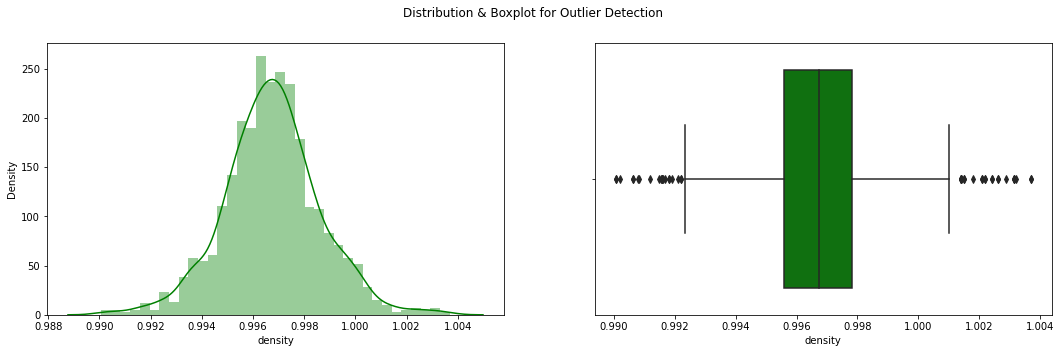

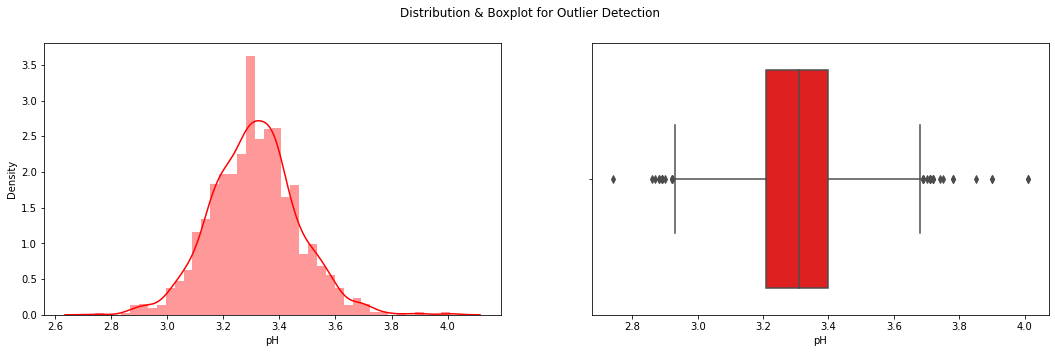

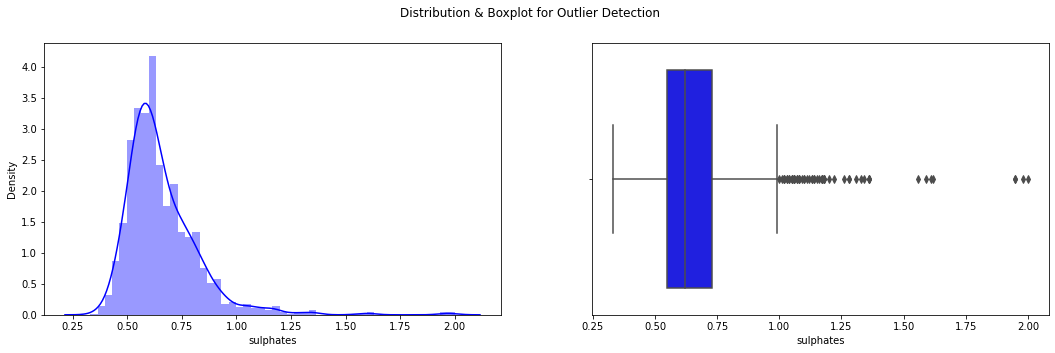

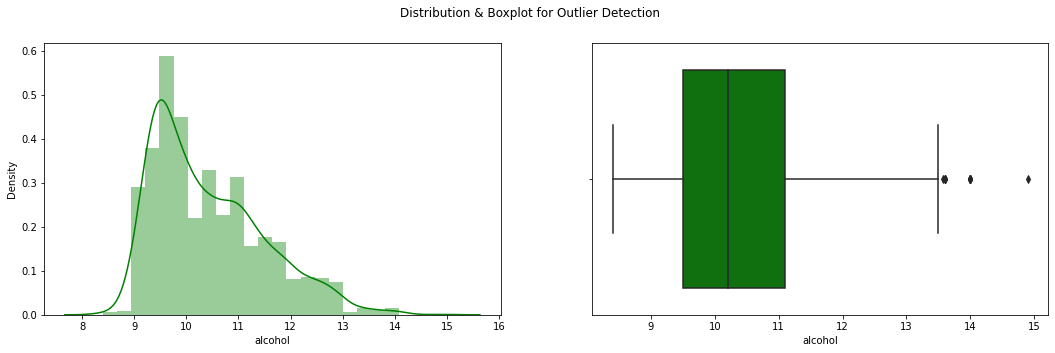

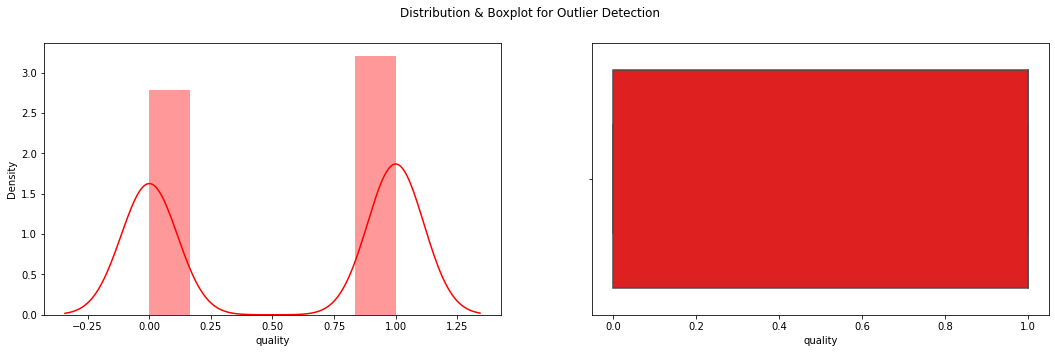

In [14]:
num = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide','density', 'pH', 'sulphates','alcohol', 'quality']

for i in num:
    outlier_viz(data[i])

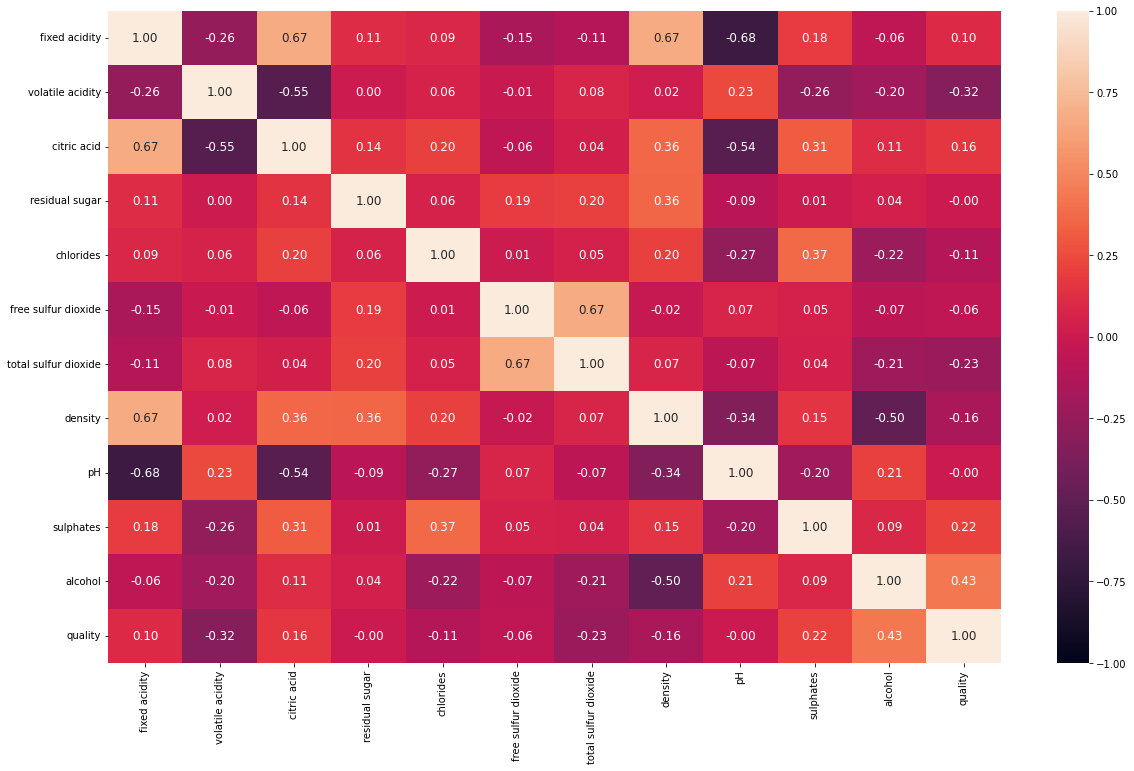

In [15]:
plt.figure(figsize=(20,12))
sns.heatmap(data[num].corr(), annot=True, annot_kws={"fontsize":12}, fmt=".2f", vmin=-1)
plt.show()

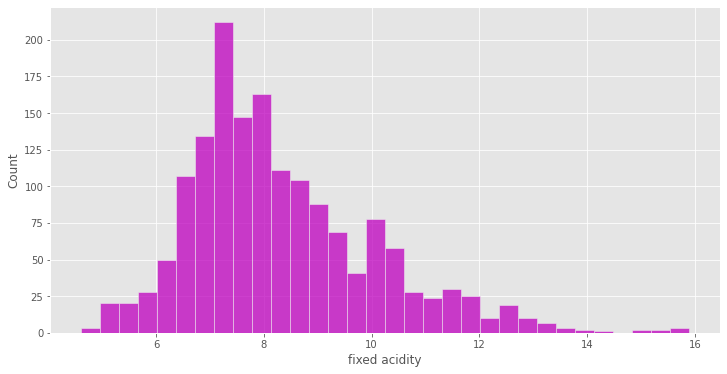

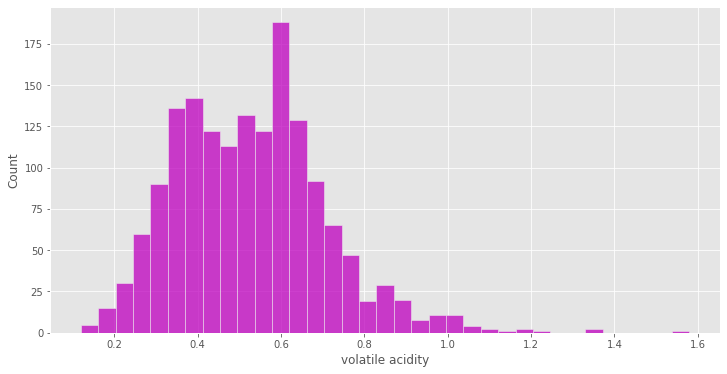

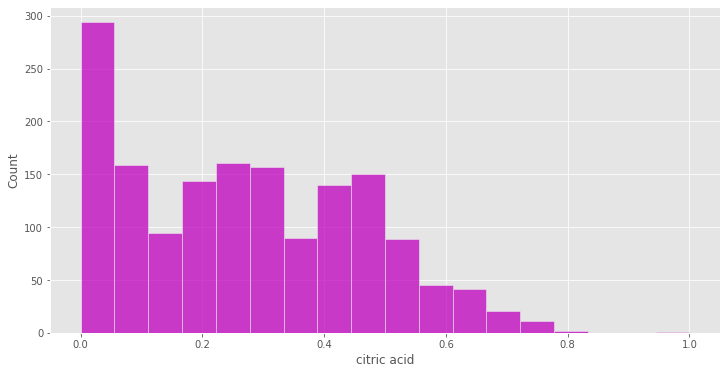

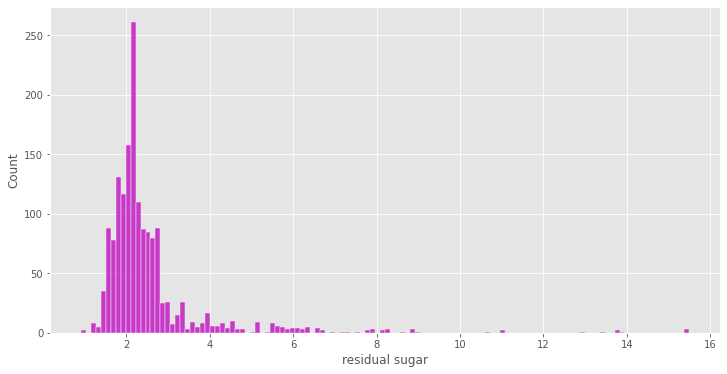

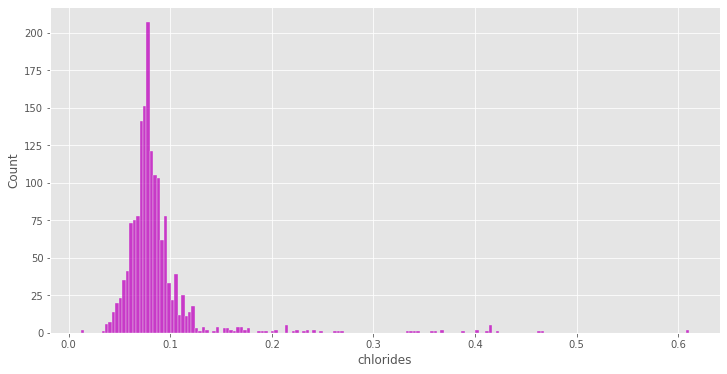

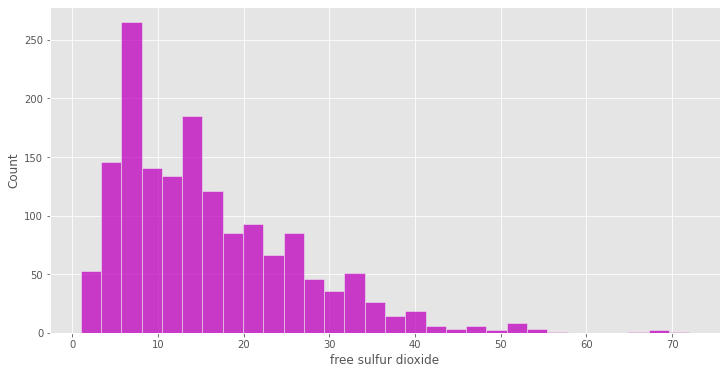

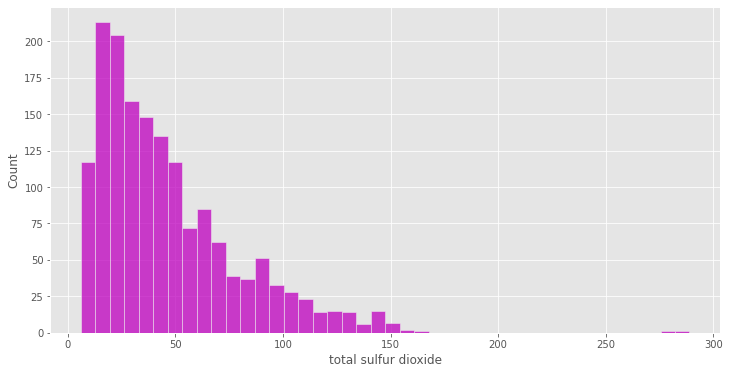

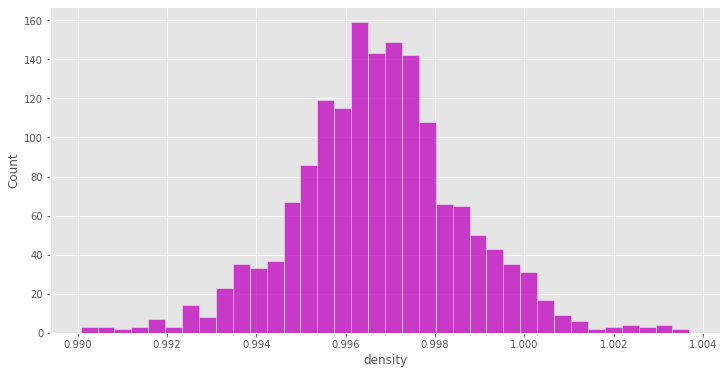

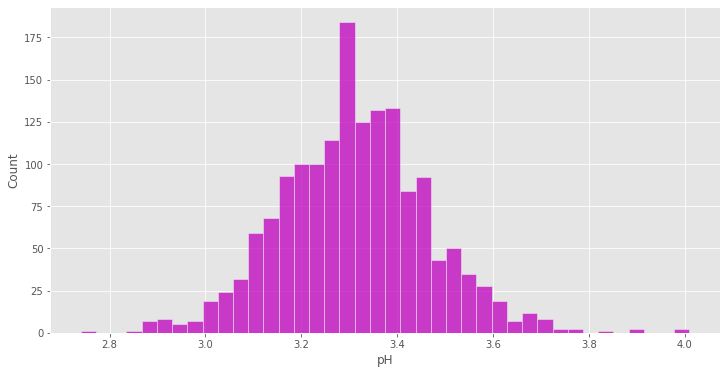

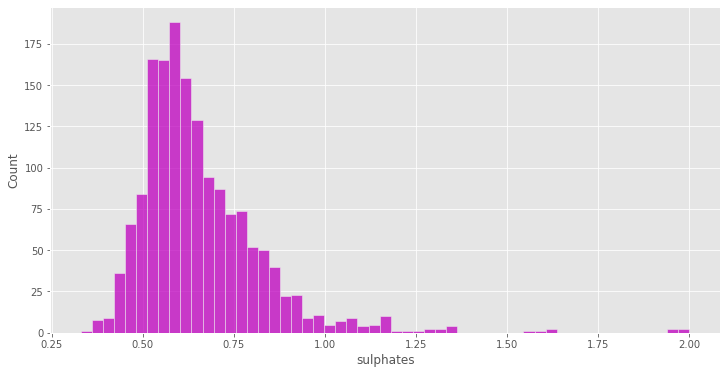

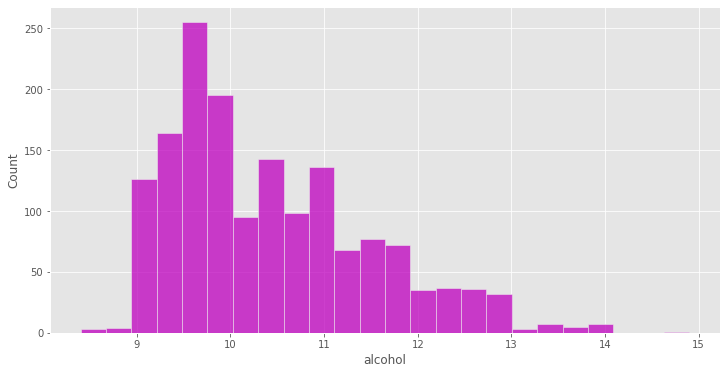

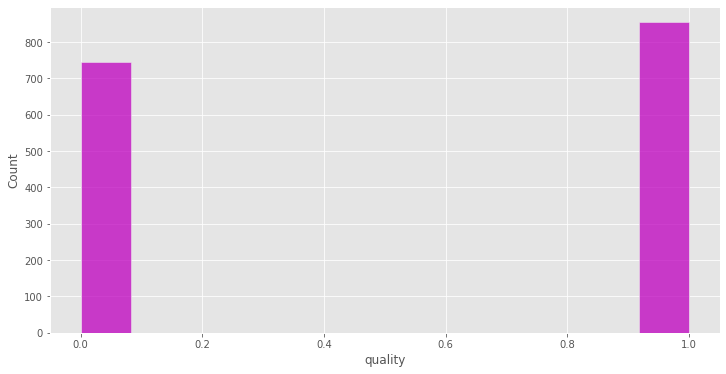

In [16]:
stl.use('ggplot')
for col in num:
    plt.figure(figsize=(12,6))
    sns.histplot(data[col], color="m")
    plt.show

In [17]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [18]:
y=data.quality
x=data.drop("quality", axis=1)

In [19]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

# voting Classifier

__A voting classifier is a machine learning estimator that trains various base models or estimators and predicts on the basis of aggregating the findings of each base estimator. The aggregating criteria can be combined decision of voting for each estimator output.__

![](http://rasbt.github.io/mlxtend/user_guide/classifier/EnsembleVoteClassifier_files/majority_voting.png)

In [20]:
from sklearn.ensemble import VotingClassifier

In [21]:
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

In [22]:
model1=SGDClassifier(random_state=0)
model2=KNeighborsClassifier(n_neighbors=2)
model3= VotingClassifier([('SGD',model1),
                         ('KNN',model2)
                         ],voting='hard')
for model in (model1,model2,model3):
    
    model.fit(xtrain,ytrain)
    print(model.__class__.__name__, model.score(xtest,ytest))

SGDClassifier 0.59375
KNeighborsClassifier 0.625
VotingClassifier 0.53125


# Bagging

__Bagging, also known as bootstrap aggregation, is the ensemble learning method that is commonly used to reduce variance within a noisy dataset. In bagging, a random sample of data in a training set is selected with replacement—meaning that the individual data points can be chosen more than once.__

![](https://miro.medium.com/max/1156/1*4uA23E47rv82m_myCkp6wQ.png)

In [23]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
model =BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)
model.fit(xtrain,ytrain)
model.score(xtest,ytest)


0.83125

In [24]:
model=RandomForestClassifier(n_estimators=100)
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.85625

# Boosting

__The idea of boosting is to train weak learners sequentially, each trying to correct its predecessor.__

![](https://miro.medium.com/max/2000/1*zTgGBTQIMlASWm5QuS2UpA.jpeg)

In [25]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [26]:
model= AdaBoostClassifier(n_estimators=100)
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.746875

# Stacking

__Essentially a stacked model works by running the output of multiple models through a “meta-learner” (usually a linear regressor/classifier, but can be other models like decision trees). The meta-learner attempts to minimize the weakness and maximize the strengths of every individual model__

![](https://miro.medium.com/max/665/0*G0Mv1RkCPMqiPZzu.png)

In [27]:
from sklearn.ensemble import  StackingClassifier

In [28]:
modell= StackingClassifier([('SGD',model1),('Tree',DecisionTreeClassifier()),
                         ('KNN',model2)], final_estimator=DecisionTreeClassifier())
modell.fit(xtrain,ytrain)
modell.score(xtest,ytest)

0.6625

<h1>thankyou for reading </h1>